# Tilfeldige tall i Python
Tilfeldige tall er nyttig i mange sammenhenger, f.eks.
- spill
- sannsynlighetsregning og statistikk
- simulering av naturfenomen (f.eks. fysikk, kjemi, biologi)

Modulen __random__ har funksjoner for å lage tilfeldige tall
- eller: _pseudo-tilfeldige_

Vil her kjapt gå gjennom de viktigste funksjonene
- samt advare mot noen mulige tabber

NB: numpy har en egen random-modul, viser ikke den her
- men kan være bedre hvis du skal bruke mye tilfeldige tall, f.eks. i store array

## Funksjoner for å generere heltall
- random.randrange()
- random.randint()

### randrange()
- har 3 parametre, som virker a la vanlig __range()__
    - fra og med første tall
    - til - men IKKE med - andre tall
    - tredje er stegverdi (1 hvis utelatt)

In [5]:
import random as r
r.randrange(1, 8, 2)

3

In [10]:
import random as r
r.randrange(1, 8)

5

In [11]:
import random as r
liste1, liste2 = [], []
for i in range(10):
    liste1.append(r.randrange(1, 8, 2))  # tilfeldig tall 1, 3, 5, 7
    liste2.append(r.randrange(1, 8))     # tilfeldig 1, 2, 3, ..., 7
print(liste1, liste2)

[7, 1, 1, 1, 7, 7, 5, 1, 5, 1] [5, 2, 1, 5, 5, 6, 6, 1, 4, 5]


### randint( )
- 2 parametre: fra_verdi, til_verdi
- __NB:__ merk at her er til_verdi inkludert
- derfor blir et kast med vanlig terning r.randint(1, 6)
    - mens r.randrange(1, 7)
- myntkast: r.randint(0,1) - 2 mulige utfall

In [12]:
import random as r
liste1, liste2 = [], []
for i in range(10):
    liste1.append(r.randint(1, 6))    # kast med vanlig terning
    liste2.append(r.randrange(1, 7))  # kast med vanlig terning
print(liste1, liste2)

[3, 2, 6, 5, 5, 1, 1, 5, 2, 4] [3, 1, 4, 2, 2, 1, 1, 6, 3, 2]


## Funksjoner som trekker tilfeldig fra lister / sekvenser
- random.choice()
- random.sample()

### random.choice( )
Trekker ett tilfeldig element fra liste (eller annen type sekvens)
- returnerer elementet
- muterer IKKE lista, dvs. den er uendret
    - hvis trukket element skal fjernes, må vi selv ordne ei ekstra kodelinje for det

In [16]:
import random as r
deltagere = ["Ada", "Oda", "Guido", "Ruby"]
winner = r.choice(deltagere)
print(winner)

Oda


### random.sample( )
Trekker k tilfeldige element fra liste (eller annen type sekvens)
- returnerer elementet
- muterer IKKE lista, dvs. den er uendret
    - hvis trukket element skal fjernes, må vi selv ordne ei ekstra kodelinje for det
- trekker unike element

In [19]:
import random as r
deltagere = ["Ada", "Oda", "Guido", "Ruby"]
winners = r.sample(deltagere, 2)
print(winners) 

['Ada', 'Oda']


In [21]:
import random as r
deltagere = ["Ada", "Oda", "Guido", "Ruby", "Ruby", "Ruby", "Ruby"]
winners = r.sample(deltagere, 2)
print(winners)

['Ruby', 'Ruby']


## stokking av lister: random.shuffle( )
- får inn ei liste
- MUTERER lista, dvs. vil ha endret rekkefølge etter operasjonen
- returnerer INGENTING

In [23]:
# Eksempel på bruk av random.shuffle
import random as r
deltagere = ["Ada", "Oda", "Guido", "Ruby"]
r.shuffle(deltagere)
print(deltagere)

['Guido', 'Ada', 'Ruby', 'Oda']


In [24]:
# MISLYKKET FORSØK PÅ BRUK, tror at den returnerer i stedet for å mutere?
import random as r
deltagere = ["Ada", "Oda", "Guido", "Ruby"]
deltagere = r.shuffle(deltagere)
print(deltagere)

None


## Funksjoner for å generere flyttall
- random.random()
    - tilfeldig flyttall fra og med 0.0, til men ikke med 1.0
- random.uniform(fra, til)
    - tilfeldig flyttall i området fra-til, endepunkter __inkludert__
    
Disse kan være nyttige i simulering av naturfenomen

In [25]:
import random as r
print(r.random())
print(r.uniform(3.0, 5.0))

0.1745292978095675
3.0986653024782576


## Viktige ting å tenke på for å få "riktige" tilfeldige tall
- når er det snakk om to uavhengige tall?
    - kaste to terninger er ikke samme som å kaste én og gange med to
- trekking med eller uten "tilbakelegging"
    - uten: dele ut kort fra en kortstokk til div. spillere
        - hvis en spiller har fått hjerter dame, kan ikke en annen også få den
    - med: f.eks. terningkast
        - selv om den første spilleren får 5, er det ikke noe hinder for at også neste får det

In [1]:
# Tester kast med en terning med randint, choice, random
# får vi 6 ca. 1/6 av gangene?
import random as r
seks_randint = seks_choice = seks_random = 0
for i in range(600000):
    seks_randint += int(r.randint(1,6) == 6)
    seks_choice += int(r.choice([1,2,3,4,5,6]) == 6)
    seks_random += int(r.random() >= 5/6)
print(seks_randint, seks_choice, seks_random)

100202 100057 100210


In [ ]:
# Tester kast med to terninger på et par måter
# Noen riktige, noen helt på vidda...
# Med riktig fremgangsmåte skal vi få 7 ca. 1/6 av gangene
import random as r
forsøk1, forsøk2, forsøk3, forsøk4 = [], [], [], []
for i in range(10000):
    forsøk1.append(r.randint(1,6) * 2)   # blir helt feil, kan kun få partall
    forsøk2.append(r.randint(2,12))      # feil sannsynlighetsfordeling (like stor sjanse for 12 som 7)
    forsøk3.append(sum(r.sample(range(1,7), 2)))  # feil, kan ikke få to like terninger
    forsøk4.append(r.randint(1,6) + r.randint(1,6)) # OK, her blir de to terningene uavhengige
print(forsøk1)
print(forsøk2)
print(forsøk3)
print(forsøk4)

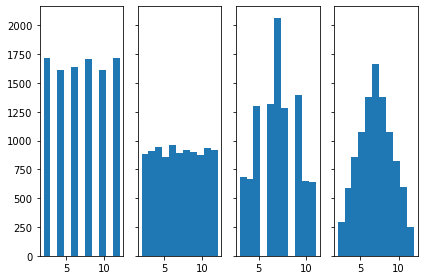

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(forsøk1, bins=11)
axs[1].hist(forsøk2, bins=11)
axs[2].hist(forsøk3, bins=11)
axs[3].hist(forsøk4, bins=11)
plt.show()

In [2]:
# Trekke en tilfeldig "farge" av kort
import random as r
result = []
for i in range(1000000):
    result.append(r.choice(["♠", "♥", "♦", "♣"]))
#print(result)
for verdi in set(result):
    antall = result.count(verdi)
    print(f'{verdi} kom {antall} g., {antall/len(result)*100}%')

♥ kom 249993 g., 24.999299999999998%
♦ kom 249798 g., 24.9798%
♣ kom 249917 g., 24.9917%
♠ kom 250292 g., 25.029200000000003%


In [ ]:
# Trekke ett tilfeldig kort fra en kortstokk
import random as r
result = []
suits = ["♠", "♥", "♦", "♣"]
values = ["2","3","4","5","6","7","8","9","10","J","Q","K","A"]
for i in range(1000000):
    result.append(r.choice(suits) + r.choice(values))
#print(result)
for verdi in set(result):
    antall = result.count(verdi)
    print(f'{verdi} kom {antall} g., {antall/len(result)*100}%')

In [4]:
r.choice(range(100))

86

In [ ]:
import random as r
result = []
suits = ["♠", "♥", "♦", "♣"]
values = ["2","3","4","5","6","7","8","9","10","J","Q","K","A"]
card_deck = []
for s in suits:
    for v in values:
        card_deck.append(s+v)
print(card_deck)
for i in range(100000):
    r.shuffle(card_deck)
    result.append(card_deck[0])
#print(result)
for verdi in set(result):
    antall = result.count(verdi)
    print(f'{verdi} kom {antall} g., {antall/len(result)*100}%')

In [ ]:
card_deck = r.shuffle(card_deck)
print(card_deck)

In [ ]:
# Trekke 5 tilfeldige tall fra range(10)
# NB: Trekker alltid unike tall, dvs. ikke samme tall flere ganger
r.sample(range(10), 5)

In [ ]:
# Dele ut 5 kort til en spiller:
r.sample(card_deck, 5)